In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import sobel, gaussian_filter
from matplotlib.colors import ListedColormap


%matplotlib widget

In [2]:
D = np.array([
    [0, 5, 2, 9, 4, 1, 7, 11, 15, 3],
    [5, 0, 3, 4, 1, 4, 2, 6, 10, 2],
    [2, 3, 0, 7, 2, 1, 5, 9, 13, 1],
    [9, 4, 7, 0, 5, 8, 2, 2, 6, 6],
    [4, 1, 2, 5, 0, 3, 3, 7, 11, 1],
    [1, 4, 1, 8, 3, 0, 6, 10, 14, 2],
    [7, 2, 5, 2, 3, 6, 0, 4, 8, 4],
    [11, 6, 9, 2, 7, 10, 4, 0, 4, 8],
    [15, 10, 13, 6, 11, 14, 8, 4, 0, 12],
    [3, 2, 1, 6, 1, 2, 4, 8, 12, 0]
])

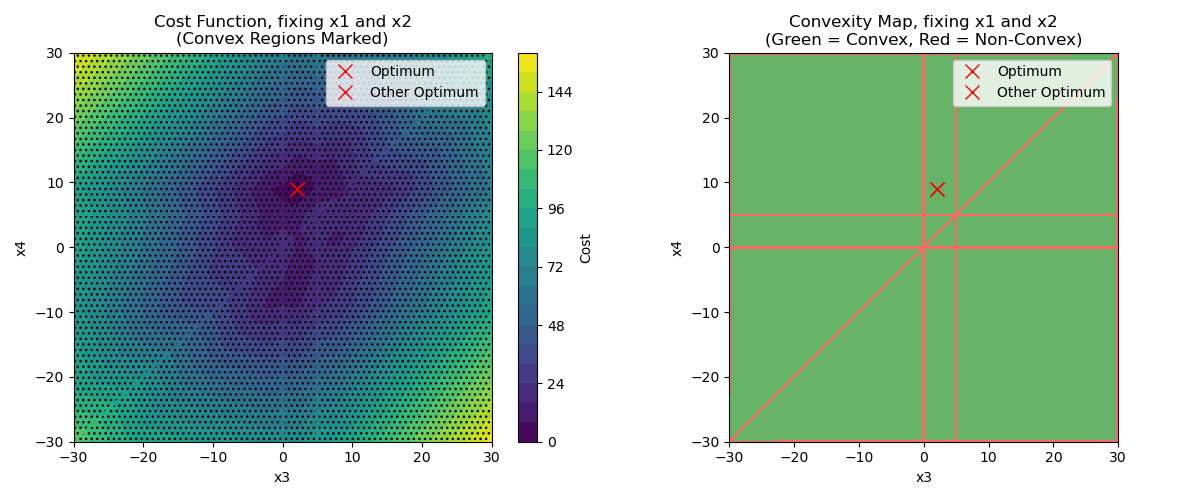

In [6]:
x1 = 0
x2 = 5

x_guess = np.linspace(-30, 30, 1000)
y_guess = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d13 = np.abs(x1 - X)
d23 = np.abs(x2 - X)
d14 = np.abs(x1 - Y)
d24 = np.abs(x2 - Y)
d34 = np.abs(X - Y)


cost = (np.abs(d13 - D[0,2]) + 
        np.abs(d23 - D[1,2]) +
        np.abs(d14 - D[0,3]) +
        np.abs(d24 - D[1,3]) +
        np.abs(d34 - D[2,3]))

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x3_opt = X[min_idx]
x4_opt = Y[min_idx]

# Flatten the cost array
flat_cost = cost_smooth.flatten()

# Get indices of sorted cost values
sorted_indices = np.argsort(flat_cost)

# Get the index of the second smallest value
second_min_flat_index = sorted_indices[1]

# Convert flat index back to 2D coordinates
second_min_idx = np.unravel_index(second_min_flat_index, cost_smooth.shape)

# Extract values at that position
x3_opt_2 = X[second_min_idx]
x4_opt_2 = Y[second_min_idx]

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x3_opt, x4_opt, 'rx', markersize=10, label='Optimum')
plt.plot(x3_opt_2, x4_opt_2, 'rx', markersize=10, label='Other Optimum')

plt.title("Cost Function, fixing x1 and x2\n(Convex Regions Marked)")
plt.xlabel("x3")
plt.ylabel("x4")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x3_opt, x4_opt, 'rx', markersize=10, label='Optimum')
plt.plot(x3_opt_2, x4_opt_2, 'rx', markersize=10, label='Other Optimum')

plt.title("Convexity Map, fixing x1 and x2\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x3")
plt.ylabel("x4")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_fix_2.png', dpi=300, bbox_inches='tight')
plt.show()

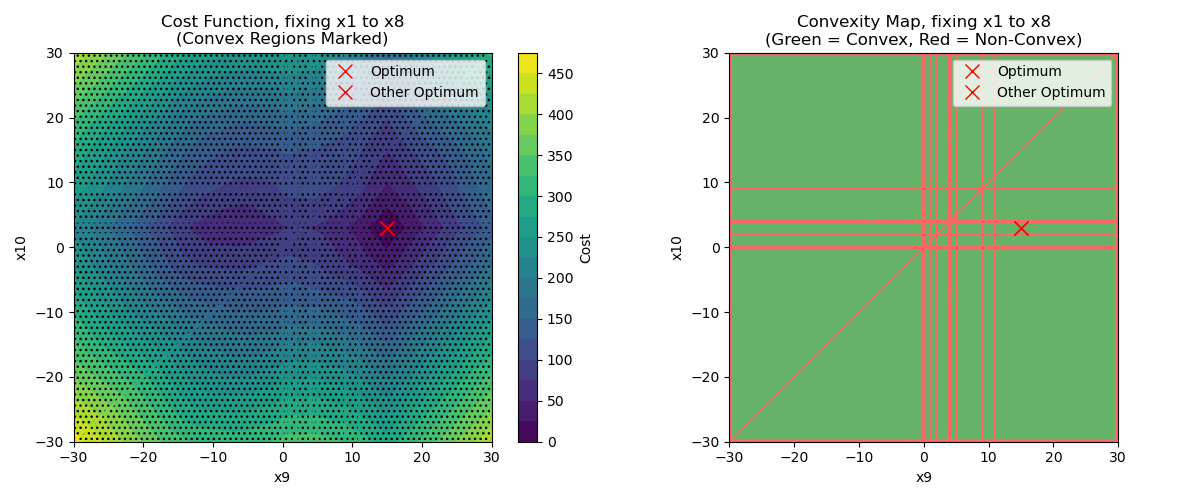

In [7]:
D = np.array([
    [0, 5, 2, 9, 4, 1, 7, 11, 15, 3],
    [5, 0, 3, 4, 1, 4, 2, 6, 10, 2],
    [2, 3, 0, 7, 2, 1, 5, 9, 13, 1],
    [9, 4, 7, 0, 5, 8, 2, 2, 6, 6],
    [4, 1, 2, 5, 0, 3, 3, 7, 11, 1],
    [1, 4, 1, 8, 3, 0, 6, 10, 14, 2],
    [7, 2, 5, 2, 3, 6, 0, 4, 8, 4],
    [11, 6, 9, 2, 7, 10, 4, 0, 4, 8],
    [15, 10, 13, 6, 11, 14, 8, 4, 0, 12],
    [3, 2, 1, 6, 1, 2, 4, 8, 12, 0]
])

x1 = 0
x2 = 5
x3 = 2
x4 = 9
x5 = 4
x6 = 1
x7 = 7
x8 = 11
x_guess = np.linspace(-30, 30, 1000)
y_guess = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d19 = np.abs(x1 - X)
d29 = np.abs(x2 - X)
d39 = np.abs(x3 - X)
d49 = np.abs(x4 - X)
d59 = np.abs(x5 - X)
d69 = np.abs(x6 - X)
d79 = np.abs(x7 - X)
d89 = np.abs(x8 - X)

d10 = np.abs(x1 - Y)
d20 = np.abs(x2 - Y)
d30 = np.abs(x3 - Y)
d40 = np.abs(x4 - Y)
d50 = np.abs(x5 - Y)
d60 = np.abs(x6 - Y)
d70 = np.abs(x7 - Y)
d80 = np.abs(x8 - Y)
d90 = np.abs(X - Y)


cost = (np.abs(d19 - D[0,8]) + 
        np.abs(d29 - D[1,8]) +
        np.abs(d39 - D[2,8]) +
        np.abs(d49 - D[3,8]) +
        np.abs(d59 - D[4,8]) +
        np.abs(d69 - D[5,8]) +
        np.abs(d79 - D[6,8]) +
        np.abs(d89 - D[7,8]) +
        np.abs(d10 - D[0,9]) +
        np.abs(d20 - D[1,9]) +
        np.abs(d30 - D[2,9]) +
        np.abs(d40 - D[3,9]) +
        np.abs(d50 - D[4,9]) +
        np.abs(d60 - D[5,9]) +
        np.abs(d70 - D[6,9]) +
        np.abs(d80 - D[7,9]) +
        np.abs(d90 - D[8,9]))

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)

x9_opt = X[min_idx]
x0_opt = Y[min_idx]
# Flatten the cost array
flat_cost = cost_smooth.flatten()

# Get indices of sorted cost values
sorted_indices = np.argsort(flat_cost)

# Get the index of the second smallest value
second_min_flat_index = sorted_indices[1]

# Convert flat index back to 2D coordinates
second_min_idx = np.unravel_index(second_min_flat_index, cost_smooth.shape)

# Extract values at that position
x9_opt_2 = X[second_min_idx]
x0_opt_2 = Y[second_min_idx]


plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x9_opt, x0_opt, 'rx', markersize=10, label='Optimum')
plt.plot(x9_opt_2, x0_opt_2, 'rx', markersize=10, label='Other Optimum')

plt.title("Cost Function, fixing x1 to x8\n(Convex Regions Marked)")
plt.xlabel("x9")
plt.ylabel("x10")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')
plt.plot(x9_opt, x0_opt, 'rx', markersize=10, label='Optimum')
plt.plot(x9_opt_2, x0_opt_2, 'rx', markersize=10, label='Other Optimum')

plt.title("Convexity Map, fixing x1 to x8\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x9")
plt.ylabel("x10")
plt.legend()

plt.tight_layout()
plt.savefig('plots/explore_fix_8.png', dpi=300, bbox_inches='tight')
plt.show()

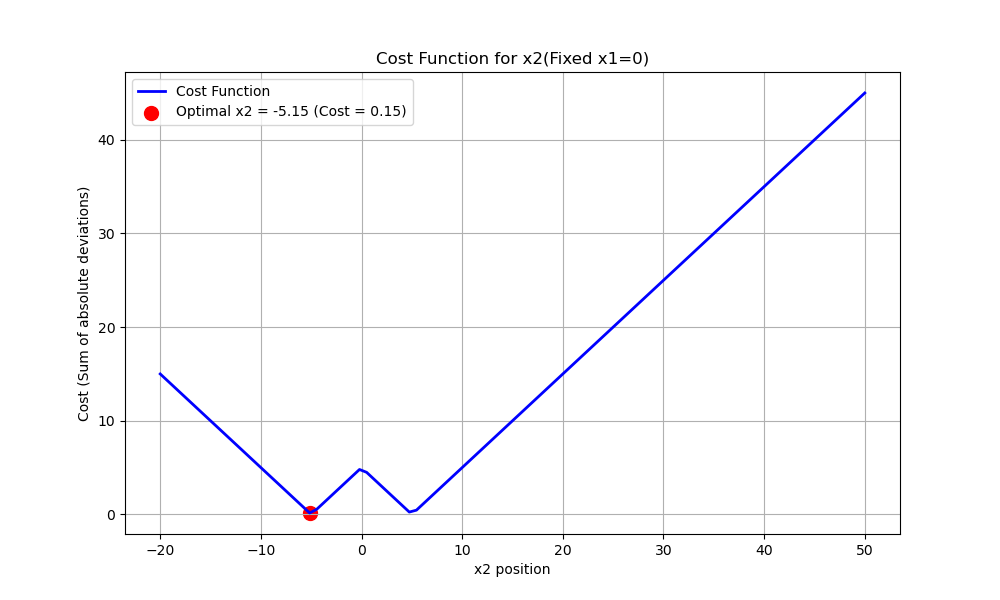

Optimal x2: -5.15
Minimum cost: 0.15


In [6]:
x1= 0

x2_guess = np.linspace(-20, 50, 100)  

cost = np.zeros_like(x2_guess)
for i, x2 in enumerate(x2_guess):
    d12 = np.abs(x1 - x2)

    
    cost[i] = np.abs(d12 - D[0, 1])


min_cost = np.min(cost)
optimal_x2 = x2_guess[np.argmin(cost)]

plt.figure(figsize=(10, 6))
plt.plot(x2_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x2, min_cost, color='red', s=100, 
            label=f'Optimal x2 = {optimal_x2:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x2 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x2(Fixed x1=0)')
plt.legend()
plt.grid(True)
plt.savefig('plots/broad_x2.png', dpi=300, bbox_inches='tight')

plt.show()

print(f"Optimal x2: {optimal_x2:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

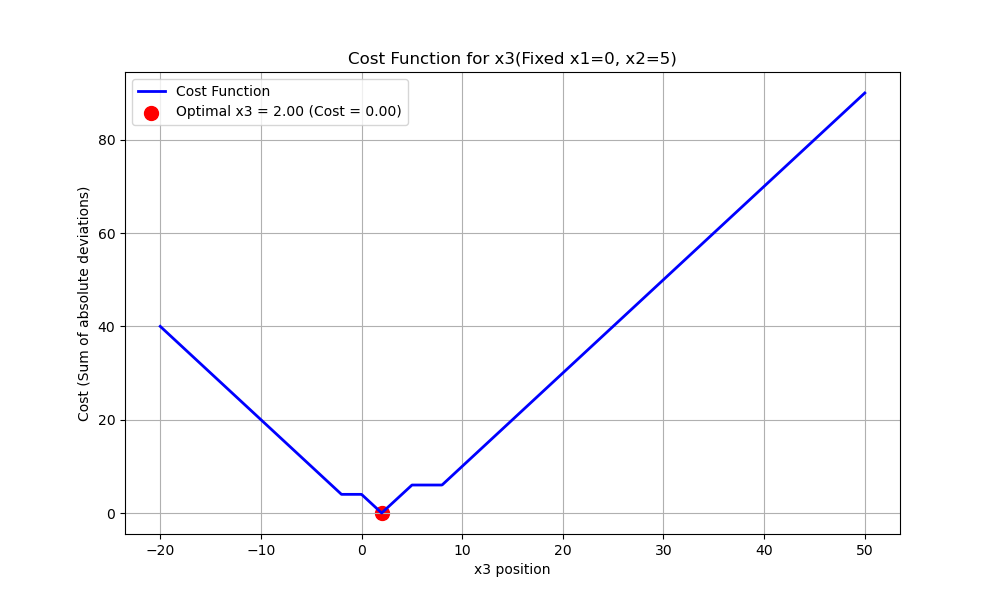

Optimal x3: 2.00
Minimum cost: 0.00


In [7]:
x1, x2= 0, 5


x3_guess = np.linspace(-20, 50, 1000) 


cost = np.zeros_like(x3_guess)
for i, x3 in enumerate(x3_guess):
    d13 = np.abs(x1 - x3)  
    d12 = np.abs(x1 - x2)
    d23 = np.abs(x2 - x3)  

    cost[i] = np.abs(d13 - D[0, 2]) + np.abs(d23 - D[1, 2])

min_cost = np.min(cost)
optimal_x3 = x3_guess[np.argmin(cost)]

plt.figure(figsize=(10, 6))
plt.plot(x3_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x3, min_cost, color='red', s=100, 
            label=f'Optimal x3 = {optimal_x3:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x3 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x3(Fixed x1=0, x2=5)')
plt.legend()
plt.grid(True)
plt.savefig('plots/broad_x3.png', dpi=300, bbox_inches='tight')

plt.show()

print(f"Optimal x3: {optimal_x3:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

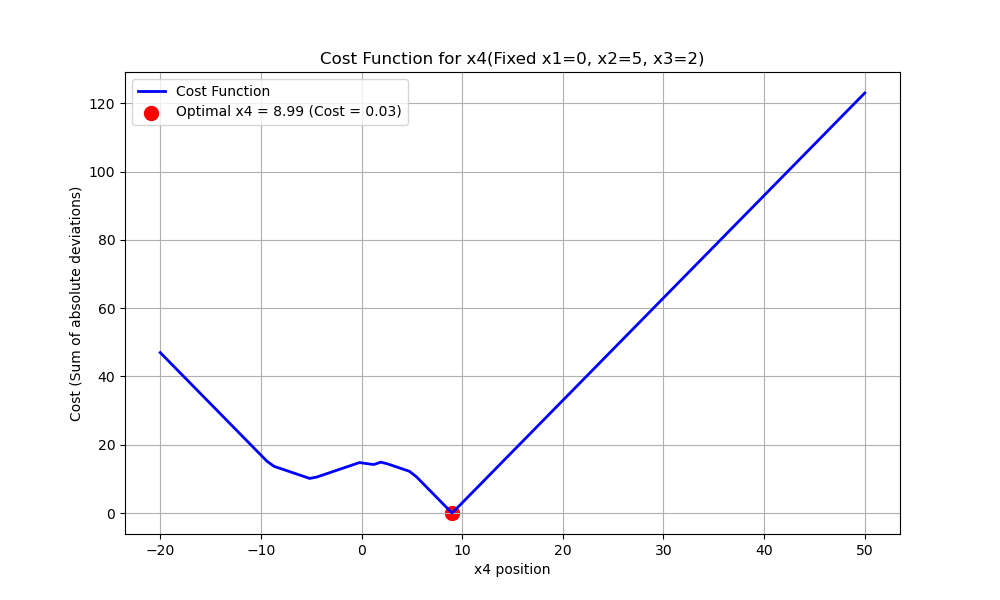

Optimal x4: 8.99
Minimum cost: 0.03


In [8]:
x1, x2, x3= 0, 5, 2

x4_guess = np.linspace(-20, 50, 100)  

cost = np.zeros_like(x4_guess)
for i, x4 in enumerate(x4_guess):
    d14 = np.abs(x1 - x4) 
    d24 = np.abs(x2 - x4)  
    d34 = np.abs(x3 - x4)  

    
    cost[i] = np.abs(d14 - D[0, 3]) + np.abs(d24 - D[1, 3])  + np.abs(d34 - D[2, 3])

min_cost = np.min(cost)
optimal_x4 = x4_guess[np.argmin(cost)]

plt.figure(figsize=(10, 6))
plt.plot(x4_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x4, min_cost, color='red', s=100, 
            label=f'Optimal x4 = {optimal_x4:.2f} (Cost = {min_cost:.2f})')


plt.xlabel('x4 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x4(Fixed x1=0, x2=5, x3=2)')
plt.legend()
plt.grid(True)
plt.savefig('plots/broad_x4.png', dpi=300, bbox_inches='tight')

plt.show()

print(f"Optimal x4: {optimal_x4:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

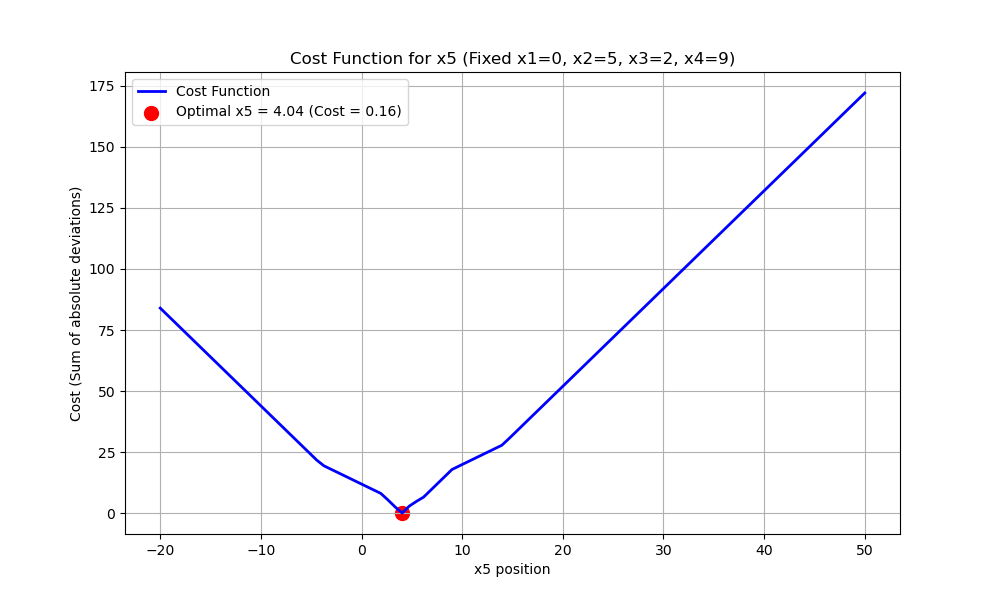

Optimal x5: 4.04
Minimum cost: 0.16


In [9]:
x1, x2, x3, x4 = 0, 5, 2, 9

x5_guess = np.linspace(-20, 50, 100)  # x5 guesses (X-axis)

cost = np.zeros_like(x5_guess)
for i, x5 in enumerate(x5_guess):
    d15 = np.abs(x1 - x5)  
    d25 = np.abs(x2 - x5) 
    d35 = np.abs(x3 - x5) 
    d45 = np.abs(x4 - x5)  
    
    cost[i] = np.abs(d15 - D[0, 4])  + np.abs(d25 - D[1, 4])  + np.abs(d35 - D[2, 4])  + np.abs(d45 - D[3, 4])

min_cost = np.min(cost)
optimal_x5 = x5_guess[np.argmin(cost)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x5_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x5, min_cost, color='red', s=100, 
            label=f'Optimal x5 = {optimal_x5:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x5 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x5 (Fixed x1=0, x2=5, x3=2, x4=9)')
plt.legend()
plt.grid(True)
plt.savefig('plots/broad_x5.png', dpi=300, bbox_inches='tight')

plt.show()

print(f"Optimal x5: {optimal_x5:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

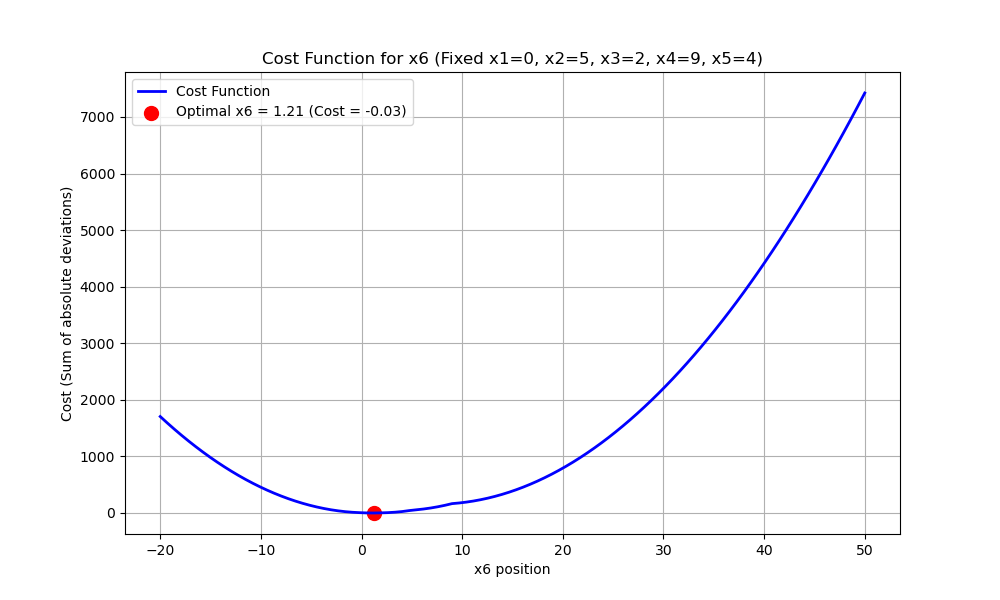

Optimal x5: 1.21
Minimum cost: -0.03


In [9]:
x1, x2, x3, x4,x5 = 0, 5, 2, 9, 4

x6_guess = np.linspace(-20, 50, 100)  

cost = np.zeros_like(x6_guess)
for i, x6 in enumerate(x6_guess):
    d16 = np.abs(x1 - x6)  
    d26 = np.abs(x2 - x6) 
    d36 = np.abs(x3 - x6)  
    d46 = np.abs(x4 - x6)  
    d56 = np.abs(x5 - x6)  
    
    cost[i] = (d16 - D[0, 5])**2  + (d26 - D[1, 5])**2  + (d36 - D[2, 5])**2  + (d46 - D[3, 5])**2  +(d56 - D[4, 5])

min_cost = np.min(cost)
optimal_x6 = x6_guess[np.argmin(cost)]

plt.figure(figsize=(10, 6))
plt.plot(x6_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x6, min_cost, color='red', s=100, 
            label=f'Optimal x6 = {optimal_x6:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x6 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x6 (Fixed x1=0, x2=5, x3=2, x4=9, x5=4)')
plt.legend()
plt.grid(True)
plt.savefig('plots/broad_x6.png', dpi=300, bbox_inches='tight')

plt.show()

print(f"Optimal x5: {optimal_x6:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

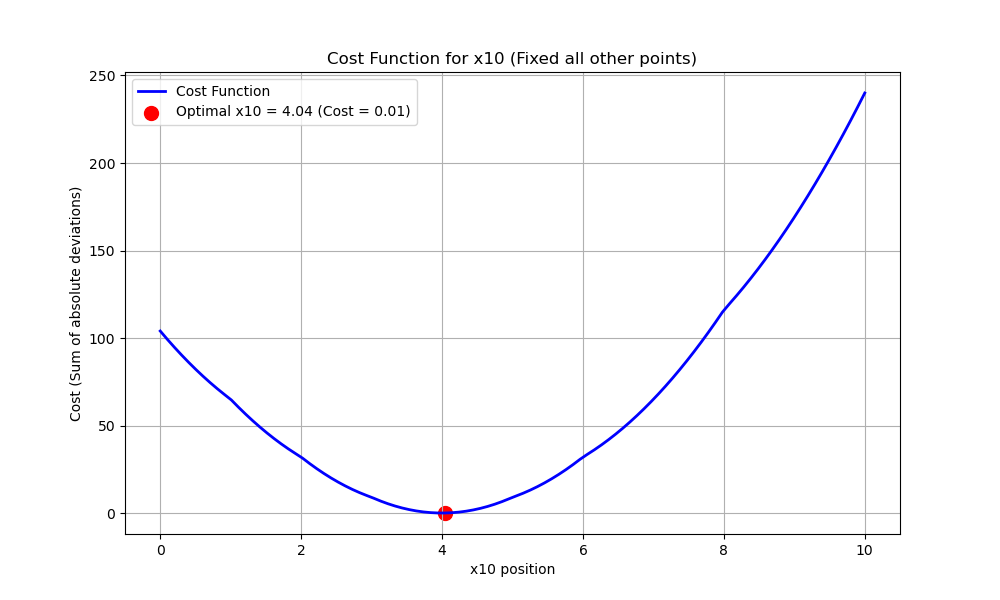

Optimal x10: 4.04
Minimum cost: 0.01


In [4]:
x1, x2, x3, x4,x5,x6,x7,x8,x9 = 1, 6, 3, 10, 5, 2, 8, 12, 16

x0_guess = np.linspace(0, 10, 100) 

cost = np.zeros_like(x0_guess)
for i, x0 in enumerate(x0_guess):
    d10 = np.abs(x1 - x0) 
    d20 = np.abs(x2 - x0)  
    d30 = np.abs(x3 - x0)
    d40 = np.abs(x4 - x0)  
    d50 = np.abs(x5 - x0) 
    d60 = np.abs(x6 - x0)
    d70 = np.abs(x7 - x0)
    d80 = np.abs(x8 - x0)
    d90 = np.abs(x9 - x0)
    
    cost[i] = (d10 - D[0, 9])**2  + (d20 - D[1, 9])**2  + (d30 - D[2, 9])**2  + (d40 - D[3, 9])**2  +(d50 - D[4, 9])**2  +(d60 - D[5, 9])**2  + (d70 - D[6, 9])**2  +(d80 - D[7, 9])**2  +(d90 - D[8, 9])**2 

min_cost = np.min(cost)
optimal_x0 = x0_guess[np.argmin(cost)]

plt.figure(figsize=(10, 6))
plt.plot(x0_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x0, min_cost, color='red', s=100, 
            label=f'Optimal x10 = {optimal_x0:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x10 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x10 (Fixed all other points)')
plt.legend()
plt.grid(True)
plt.savefig('plots/broad_x10.png', dpi=300, bbox_inches='tight')

plt.show()

print(f"Optimal x10: {optimal_x0:.2f}")
print(f"Minimum cost: {min_cost:.2f}")


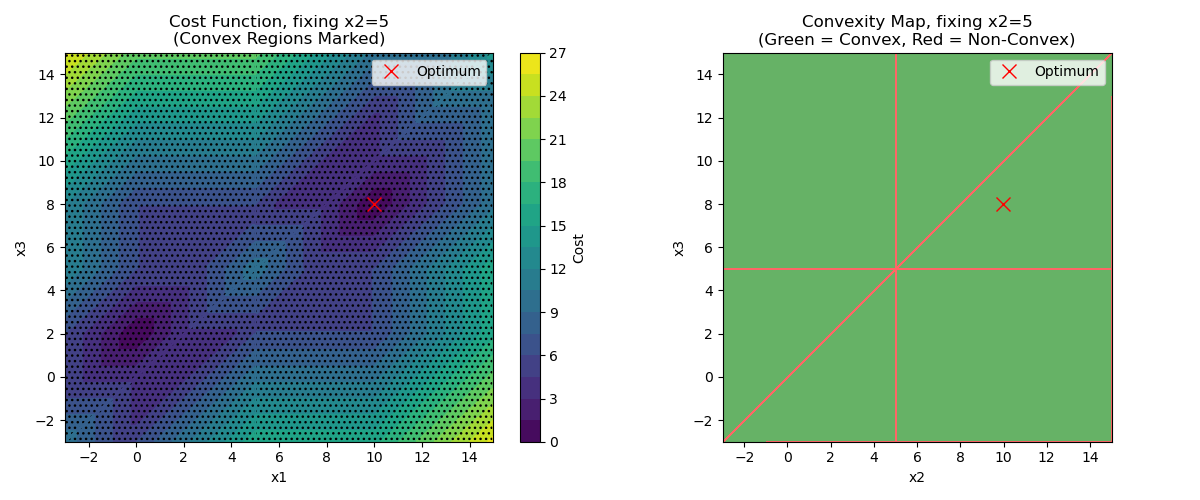

In [8]:
x2 = 5
x_guess = np.linspace(-3, 15, 1000)
y_guess = np.linspace(-3, 15, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d12 = np.abs(X - x2)
d13 = np.abs(X - Y)
d23 = np.abs(x2 - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x1_opt = X[min_idx]
x3_opt = Y[min_idx]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Cost Function, fixing x2=5\n(Convex Regions Marked)")
plt.xlabel("x1")
plt.ylabel("x3")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map, fixing x2=5\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_x2_5.png', dpi=300, bbox_inches='tight')
plt.show()

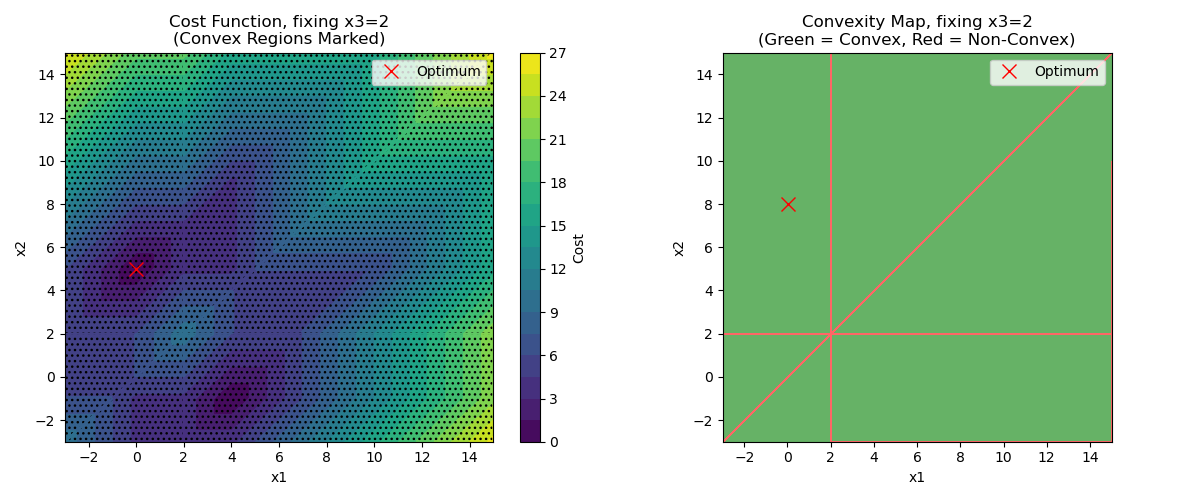

In [7]:
x3 = 2
x_guess = np.linspace(-3, 15, 1000)
y_guess = np.linspace(-3, 15, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d12 = np.abs(X - Y)
d13 = np.abs(X - x3)
d23 = np.abs(Y - x3)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x1_opt = X[min_idx]
x2_opt = Y[min_idx]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x1_opt, x2_opt, 'rx', markersize=10, label='Optimum')
plt.title("Cost Function, fixing x3=2\n(Convex Regions Marked)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map, fixing x3=2\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_x3_2.png', dpi=300, bbox_inches='tight')
plt.show()